<!--NAVIGATION-->
< [文本和标注](04.09-Text-and-Annotation.ipynb) | [目录](Index.ipynb) | [自定义matplotlib：配置和样式单](04.11-Settings-and-Stylesheets.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.10-Customizing-Ticks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Customizing Ticks

# 自定义刻度

> Matplotlib's default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This section will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Matplotlib默认的刻度标志和格式被设计成能满足许多通用场景的需求，但是不会是所有图表的最佳选择。本节会介绍一些调整刻度位置和格式的例子来说明自定义刻度的使用。

> Before we go into examples, it will be best for us to understand further the object hierarchy of Matplotlib plots.
Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the ``figure`` is the bounding box within which plot elements appear.
Each Matplotlib object can also act as a container of sub-objects: for example, each ``figure`` can contain one or more ``axes`` objects, each of which in turn contain other objects representing plot contents.

在介绍例子之前，我们应该加深对Matplotlib图表的对象层次的理解。Matplotlib的设计目标是展示在图表中的所有内容都会表达成为Python的对象：例如，回忆前面我们介绍过`figure`指的是用来展示图表所有内容的方框。每个Matplotlib对象也被设计为其子对象的一个容器：例如`figure`对象中可以包含一个或多个`axes`对象，每个`axes`对象都依次包含着其他用来展示图表的内容对象。

> The tick marks are no exception. Each ``axes`` has attributes ``xaxis`` and ``yaxis``, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

刻度也不例外。每个`axes`对象都有着属性`xaxis`和`yaxis`，表示x和y轴，其中包含着所有的属性用来指代轴的线、刻度和标签。

## Major and Minor Ticks

## 主要的和次要的刻度

> Within each axis, there is the concept of a *major* tick mark, and a *minor* tick mark. As the names would imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots:

在每个坐标轴上，都有*主要的*刻度和*次要的*刻度概念。正如名字指代的，主要刻度通常是大的和更多用到的，而次要刻度通常是小的。默认Matplotlib很少使用次要刻度，但是在对数图表中我们可能会看到它们：

译者注：在Matplotlib 2.0之后，当axis的跨度过大时，默认次要刻度将会不再展示，因此，下面的代码经过了修改，加上了xlim和ylim参数。

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

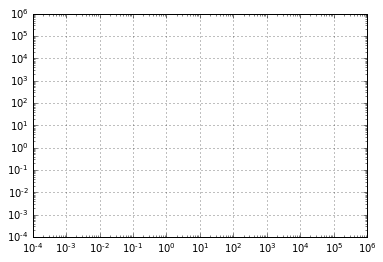

In [2]:
ax = plt.axes(xscale='log', yscale='log', xlim=[10e-5, 10e5], ylim=[10e-5, 10e5])
ax.grid();

> We see here that each major tick shows a large tickmark and a label, while each minor tick shows a smaller tickmark with no label.

我们看到每个主要刻度显示了一个大的标志和标签，而每个次要刻度显示了一个小的刻度标志没有标签。

> These tick properties—locations and labels—that is, can be customized by setting the ``formatter`` and ``locator`` objects of each axis. Let's examine these for the x axis of the just shown plot:

这些刻度属性，位置和标签，都可以使用每个轴的`formatter`和`locator`对象进行个性化设置。下面我们来查看一下x轴的相应对象：

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

> We see that both major and minor tick labels have their locations specified by a ``LogLocator`` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a ``NullFormatter``: this says that no labels will be shown.

我们看到主要和次要刻度的位置都是使用`LogLocator`来设置的（对于对数图表来说那是理所当然的）。然而次要刻度的标签的格式是`NullFormatter`：这表示次要刻度不会显示标签。

译者注：新版Matplotlib已经修改，可以看到Formatter都统一成为了LogFormatterSciNotation，再根据图表实际情况选择是否展示标签。

> We'll now show a few examples of setting these locators and formatters for various plots.

下面我们就可以开始介绍一些设置这些locator和formatter的例子了。

## Hiding Ticks or Labels

## 隐藏刻度和标签

> Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using ``plt.NullLocator()`` and ``plt.NullFormatter()``, as shown here:

也许最常见的刻度/标签格式设置的操作是隐藏刻度或标签。这可以通过使用`plt.NullLocator()`和`plt.NullFormatter()`来设置，如下例：

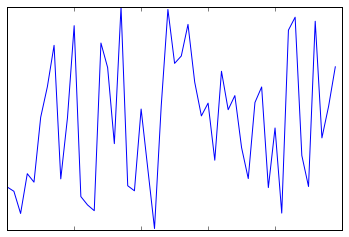

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

> Notice that we've removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems (see, for example, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

注意上图中我们去除了x轴的标签（但是保留了刻度或网格线），y轴的刻度和标签都被去除了。图表中没有刻度和标签在很多情况下很有用，例如，当你希望展示一个图像的网格。比方说，考虑下面的图表，包含着不同的头像，一个很常见的有监督机器学习问题（参见[深入：支持向量机](05.07-Support-Vector-Machines.ipynb)）：

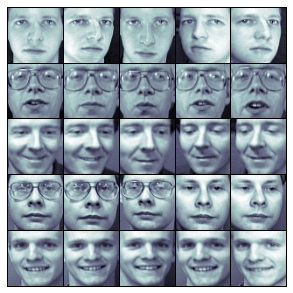

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 从scikit-learn载入头像数据集
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

> Notice that each image has its own axes, and we've set the locators to null because the tick values (pixel number in this case) do not convey relevant information for this particular visualization.

注意上图中每张图像都有它自己的axes，我们将每一个axes的locator都设置为null因为这些刻度值（像素值）在这里并没有任何实际意义。

## Reducing or Increasing the Number of Ticks

## 减少或增加刻度的数量

> One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here:

默认设置的一个常见问题是当子图表较小时，刻度标签可能会粘在一起。我们可以从下面例子看到：

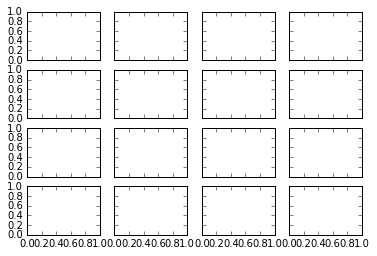

In [7]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

> Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher.
We can fix this with the ``plt.MaxNLocator()``, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

特别是x轴，标签的数字就快重叠在一起了，这让这些标签难以认清。我们可以通过`plt.MaxNLocator()`来修正这点，用它可以设置最大展示刻度的数量。Matplotlib会自己计算按照这个最大数量计算的刻度位置：

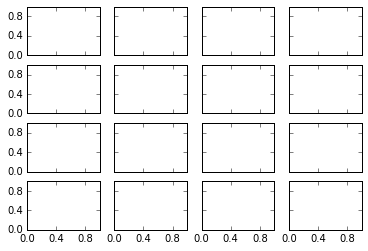

In [8]:
# 对x和y轴设置刻度最大数量
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

> This makes things much cleaner. If you want even more control over the locations of regularly-spaced ticks, you might also use ``plt.MultipleLocator``, which we'll discuss in the following section.

上图就清晰多了。如果你希望对于刻度位置进行更加精细的控制，你可以使用`plt.MultipleLocator`，我们会接下来讨论这个对象。

## Fancy Tick Formats

## 复杂的刻度格式

> Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like do do something more.
Consider this plot of a sine and a cosine:

Matplotlib的默认刻度格式只能在很多常见情况下工作良好，但是在特殊情况下你会希望能够更多的进行个性化。考虑下面的正弦和余弦图表：

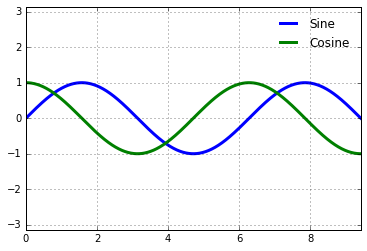

In [9]:
# 绘制正弦和余弦图表
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、图例和轴极限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

> There are a couple changes we might like to make. First, it's more natural for this data to space the ticks and grid lines in multiples of $\pi$. We can do this by setting a ``MultipleLocator``, which locates ticks at a multiple of the number you provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/4$:

这里有几个我们希望进行的改变。首先，如果刻度的间距和网格线是$\pi$的倍数会显得更加自然。我们可以通过`MultipleLocator`来设置它，这个对象用来设置刻度的配置。为了更直观，我们设置主要刻度为$\frac{\pi}{2}$位置，设置次要刻度为$\frac{\pi}{4}$位置：

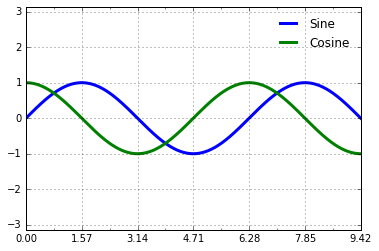

In [10]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

> But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use ``plt.FuncFormatter``, which accepts a user-defined function giving fine-grained control over the tick outputs:

但是上图看起来有点傻：我们可以看出刻度确实是$\pi$的倍数，但是使用了小数的展示让它们看起来很奇怪。要修正这些标签，我们需要修改刻度的formatter。在这种情况中，没有內建的formatter可以给我们使用，因此我们使用`plt.FuncFormatter`，这个对象能够接受一个用户自定义的函数来提供对于刻度标签的精细控制：

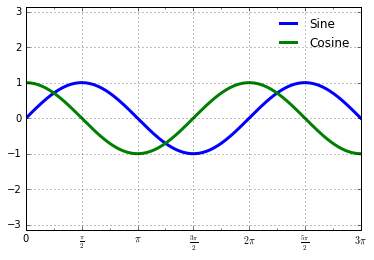

In [11]:
def format_func(value, tick_number):
    # N是pi/2的倍数
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0" # 0点
    elif N == 1:
        return r"$\frac{\pi}{2}$" # pi/2
    elif N == 2:
        return r"$\pi$" # pi
    elif N % 2 > 0:
        return r"$\frac{{%d}\pi}{2}$" %N # n*pi/2 n是奇数
    else:
        return r"${0}\pi$".format(N // 2) # n*pi n是整数

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

> This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, ``"$\pi$"`` is rendered as the Greek character $\pi$.

上图看起来好多了。注意到我们使用到了Matplotlib的LaTeX支持，使用美元符号将LaTeX字符串括起来。这是用来展示数学符号和公式的简便方法：在这个例子中``"$\pi$"``被渲染成希腊字母$\pi$。

> The ``plt.FuncFormatter()`` offers extremely fine-grained control over the appearance of your plot ticks, and comes in very handy when preparing plots for presentation or publication.

`plt.FuncFomatter()`提供了对于图表刻度最高级的自定义和精细控制，并且当你需要创建需要印刷或出版的图表时非常方便。

## Summary of Formatters and Locators

## Formatter 和 Locator 总结

> We've mentioned a couple of the available formatters and locators.
We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentaion.
Each of the following is available in the ``plt`` namespace:

我们已经介绍了一些formatter和locator。在最后我们通过将內建的locator和formatter参数列出来对本节做一个总结。要获得更多相关内容，请参阅文档或Matplotlib的在线文档。下表中列出的对象在`plt`命名空间中都是有效的：

Locator对象        | 描述
---------------------|-------------
``NullLocator``      | 无刻度
``FixedLocator``     | 固定刻度位置
``IndexLocator``     | 序号图表刻度 (例如x = range(len(y)))
``LinearLocator``    | 从最小到最大值的均匀分割刻度
``LogLocator``       | 从最小到最大值的对数分割刻度
``MultipleLocator``  | 某个基数的倍数刻度
``MaxNLocator``      | 刻度数量最大值
``AutoLocator``      | 默认的刻度数量最大值
``AutoMinorLocator`` | 默认的次要刻度

Formatter对象       | 描述
----------------------|---------------
``NullFormatter``     | 无标签
``IndexFormatter``    | 从一个列表获得标签
``FixedFormatter``    | 从固定的字符串设置标签
``FuncFormatter``     | 使用自定义函数设置标签
``FormatStrFormatter``| 使用一个格式化字符串设置标签
``ScalarFormatter``   | 默认的标量标签
``LogFormatter``      | 默认的对数标签

> We'll see further examples of these through the remainder of the book.

在本书后续章节我们会看到更多的例子。

<!--NAVIGATION-->
< [文本和标注](04.09-Text-and-Annotation.ipynb) | [目录](Index.ipynb) | [自定义matplotlib：配置和样式单](04.11-Settings-and-Stylesheets.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.10-Customizing-Ticks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
